In [69]:
#Import all the required libraries to run the code
import os # Provides a way of using OS dependent functionality
import numpy as np # For use of efficient use of array 
import matplotlib.pyplot as plt # For ploting the figures
import random # random number generatinf
from skimage.feature import hog # From sklearn import histogram oriented gradient
import cv2 as cv2 # for image processing (imread,imshow,imwrite)
import glob

* Read Images

In [70]:
# Read the number of vehicle images
vehicles=glob.glob('./Udacity-CarND-Vehicle-Detection-and-Tracking-master/vehicles/vehicles/*/*.png')
nonvehicles=glob.glob('./Udacity-CarND-Vehicle-Detection-and-Tracking-master/non-vehicles/non-vehicles/*/*.png')
vehicle_image=[]
nonvehicle_image=[]
for i in vehicles:
    readImage=cv2.imread(i)# read the vehicle image
    rgbImage=cv2.cvtColor(readImage,cv2.COLOR_BGR2RGB)
    vehicle_image.append(rgbImage)
print('Vehicle Images are read')
for i in nonvehicles:
    readImage=cv2.imread(i)# read the image nonvehicle image
    rgbImage=cv2.cvtColor(readImage,cv2.COLOR_BGR2RGB)
    nonvehicle_image.append(rgbImage)
print('Non Vehicle Images are read')
print('Number of Vehicles are:'+str(len(vehicle_image)))
print('Number of non vehicles are:'+str(len(nonvehicle_image)))

Vehicle Images are read
Non Vehicle Images are read
Number of Vehicles are:8792
Number of non vehicles are:8968


* I don't understand why I need to change from BGR to RGB here?
* From sources it is known that in opencv the image is always stored in BGR format.But our computer will recognize RGB format. So it is mandatory to change from BGR to RGB format 
* BGR format is used by some platforms like Gamegear

1. Now its time to visualize the images

The shape of the image of vehicle:(64, 64, 3)
The shape of the image of non vehicle:(64, 64, 3)


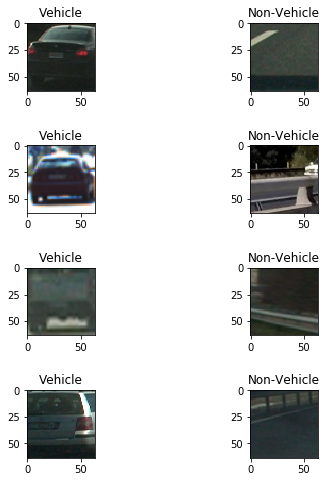

In [71]:
f,ax=plt.subplots(4,2,figsize=(8,8))# Take the subplot 4X2
plt.subplots_adjust(hspace=0.8,wspace=0.001)
for i in range(4):    
    v=random.randint(0,len(vehicle_image)-1)# Take any random image from vehicle dataset
    nv=random.randint(0,len(nonvehicle_image)-1)# Take any random image of nonvehicle
    ax[i,0].imshow(vehicle_image[v])# show the image of vehicle 
    ax[i,0].set_title('Vehicle')
    ax[i,1].imshow(nonvehicle_image[nv])#show the nonvehicle images 
    ax[i,1].set_title('Non-Vehicle')
print('The shape of the image of vehicle:'+str(np.shape(vehicle_image[v])))
print('The shape of the image of non vehicle:'+str(np.shape(nonvehicle_image[nv])))

* From here we can know that each image size is 64X64X3 (64X64 pixel size and 3 channel(RGB)) 

# Extracting Features (We will do in three ways)
 * Color Spaces 
 * Spatial Binning
 * HOG(Histogram Oriented Gradient)


# 1.Color Spaces Feature Extraction

* What is color space histogram feature extraction?

Histogram is the distribution of colors in feature space in an image. It can be visualized as a graph which gives the high level of intuition of intensity(pixel value) distribution. Here we are going to assume RGB space so values are 0 to 255.
When plotting the histogram, the X-axis serves as our “bins”. If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned to the X-axis value is then plotted on the Y-axis.

In [79]:
## Extract Color spaces
#Creating Histogram
def ExtractColorHistogram(image,nbins=32,bins_range=(0,255),resize=None):
    if (resize!=None):
        image=cv2.resize(image,resize)
    zero_channel=np.histogram(image[:,:,0],bins=nbins,range=bins_range)
    first_channel=np.histogram(image[:,:,1],bins=nbins,range=bins_range)
    second_channel=np.histogram(image[:,:,2],bins=nbins,range=bins_range)
    return zero_channel,first_channel,second_channel
def find_bin_center(histogram_channel):
    bin_edges=histogram_channel[1]
    bin_center=(bin_edges[1:]+bin_edges[0:len(bin_edges)-1])/2
    return bin_center
#def total_color_features(zero_channel,first_channel,second_channel):
#    return np.concatenate(zero_channel[0],first_channel[0],second_channel[0])

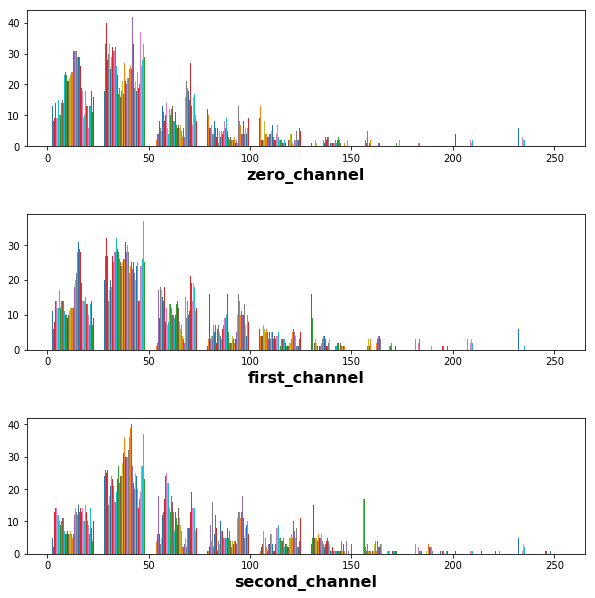

In [73]:
# To check the histogram plots for each channel of one sample image
image=vehicle_image[1]
f,axes=plt.subplots(3,1,figsize=(10,10))
f.subplots_adjust(hspace=0.5)
labels=['zero_channel','first_channel','second_channel']
for i in range(3):
    axes[i].hist(image[:,:,i],bins=10,range=(0,255))
    axes[i].set_xlabel(labels[i],fontweight='bold',fontsize=16)

## Now its time to convert RGB colorspace to YUV colorspace and check color features
### Why to convert RGB colorspace to YUV colorspace?
* RGB colorspace is most suitable for image or video display but YUV color space is suitable for image/video processing. YUV colorspace encodes a color image/video taking into account properties of human eye that allows for reduced bandwidth for chroma component without distrotion 

The number of feature from colorspace:384


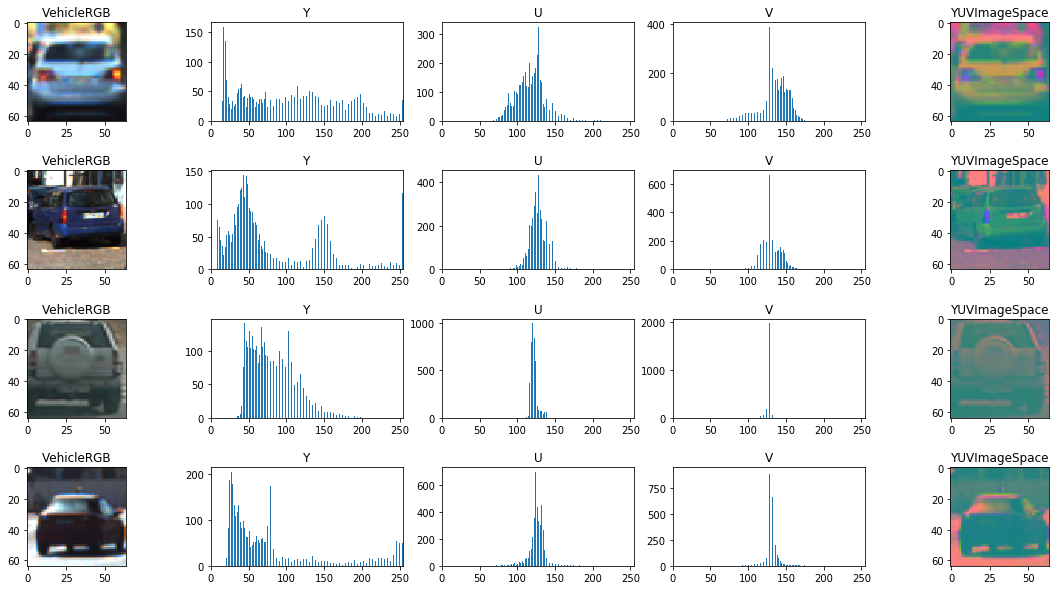

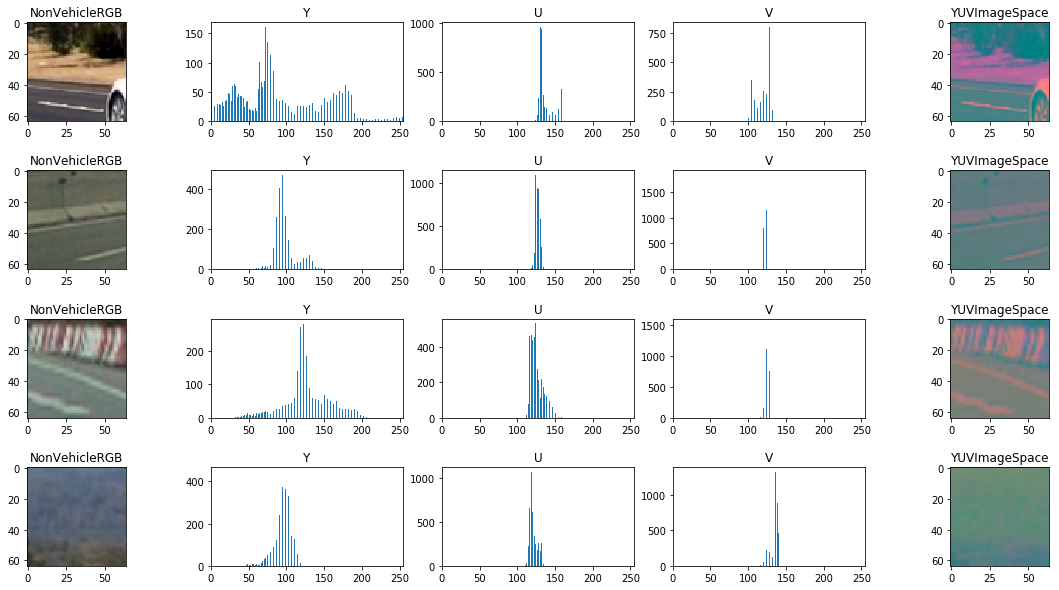

In [104]:
f,axes=plt.subplots(4,5,figsize=(20,10))
f.subplots_adjust(hspace=0.5)
for i in range(4):
    v=random.randint(0,len(vehicle_image)-1)
    YUVImage=cv2.cvtColor(vehicle_image[v],cv2.COLOR_RGB2YUV)
# Take the 3 channels of YUV imagespace
    r,g,b=ExtractColorHistogram(YUVImage,128)
    center=find_bin_center(r)
    axes[i,0].imshow(vehicle_image[v])
    axes[i,0].set_title('VehicleRGB')
    axes[i,1].set_xlim(0,255)
    axes[i,1].bar(center,r[0])
    axes[i,1].set_title('Y')
    axes[i,2].set_xlim(0,255)
    axes[i,2].bar(center,b[0])
    axes[i,2].set_title('U')
    axes[i,3].set_xlim(0,255)
    axes[i,3].bar(center,g[0])
    axes[i,3].set_title('V')
    axes[i,4].imshow(YUVImage)
    axes[i,4].set_title('YUVImageSpace')
# Now its time for color space feature for nonvehicle
f1,axes1=plt.subplots(4,5,figsize=(20,10))
f1.subplots_adjust(hspace=0.5)
for i in range(4):
    nv=random.randint(0,len(nonvehicle_image)-1)
    YUVImage=cv2.cvtColor(nonvehicle_image[nv],cv2.COLOR_RGB2YUV)
    r,g,b=ExtractColorHistogram(YUVImage,128)
    center=find_bin_center(r)
    axes1[i,0].imshow(nonvehicle_image[nv])
    axes1[i,0].set_title('NonVehicleRGB')
    axes1[i,1].set_xlim(0,255)
    axes1[i,1].bar(center,r[0])
    axes1[i,1].set_title('Y')
    axes1[i,2].set_xlim(0,255)
    axes1[i,2].bar(center,b[0])
    axes1[i,2].set_title('U')
    axes1[i,3].set_xlim(0,255)
    axes1[i,3].bar(center,g[0])
    axes1[i,3].set_title('V')
    axes1[i,4].imshow(YUVImage)
    axes1[i,4].set_title('YUVImageSpace')
features=np.concatenate((r[0],g[0],b[0]))
print('The number of feature from colorspace:'+str(len(features)))

## Now its time for spatial binning

### Now in my mind one question raised i.e. what is spatial binning?

* Spatial binning is a discretizing the location values into a small number of groups associated with graphical areas.
* Spatial binning reduce the resolution of the image having large amount of features.

In [108]:
# It is basically resizing the image have some group
def spatial_binning(image,size):
# Convert into feature vector
    features=cv2.resize(image,size).ravel()
    return features

Number of features before spatial binning 12288
Number of features after spatial binning 3072


Text(0.5,1,'After Spatial Binning(reduced resolution)')

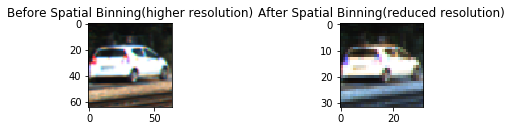

In [132]:
#Check spatial binning for one random image test
im1=vehicle_image[200]
im1=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
feature_vec=spatial_binning(im1,size=(32,32))
print("Number of features before spatial binning",len(vehicle_image[1].ravel()))
print('Number of features after spatial binning',len(feature_vec))
f,axes=plt.subplots(1,2,figsize=(6,4))
f.subplots_adjust(hspace=1,wspace=2)
axes[0].imshow(vehicle_image[200])
axes[0].set_title('Before Spatial Binning(higher resolution)')
axes[1].imshow(feature_vec.reshape((32,32,3)))
axes[1].set_title('After Spatial Binning(reduced resolution)')

* From above we have got huge amount of features with low resolutions

## HOG(Histogram Oriented Gradient)

### What is feature vector?
* It is representation of an image or an image patch that simplifies the image by extracting useful information and throw out extraneous information. 
* Feature vectors are not useful for viewing an image, but it is very useful for task like image recognition and object detection.
* The feature vectors are produced from the HOG algorithms and fed into an image classification algorithm like Support vector machine produce good results.

#### HOG?
* HOG feature descriptor, the histogram distribution of direction of gradients(orient gradients) are used as features. The X and Y gradients(X and Y derivatives) of an image are useful because the magnitude of the gradient is large around edge and corners (region of abrupt intensity change). 
* At every pixel the gradient has a magnitude and direction. For color image, the gradients of 3 channels are evaluated. The magnitude of gradient at a pixel is maximum of the magnitude of the gradient of 3 channels and the angle is the angle corresponding to the maximum gradient.

In [142]:
# Test the HOG of any sample vehicle image
def GetFeatureFromHog(image,orient, cellsPerBlock,pixelsPerCell, visualise=False, feature_vector_flag=True):
    if (visualise== True):
        hog_features,hog_image=hog(image,orientations=orient,pixels_per_cell=(pixelsPerCell, pixelsPerCell),
                                  cells_per_block=(cellsPerBlock,cellsPerBlock),visualise=True, 
                                   feature_vector=feature_vector_flag)
        return hog_features,hog_image
    else:
        hog_features=hog(image,orientations=orient,pixels_per_cell=(pixelsPerCell, pixelsPerCell),
                        cells_per_block=(cellsPerBlock,cellsPerBlock),visualise=False,
                        feature_vector=feature_vector_flag)
        return hog_features

/home/rabiranjan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Feature vector length is: 1764
Number of features that can be extracted from an image 4096


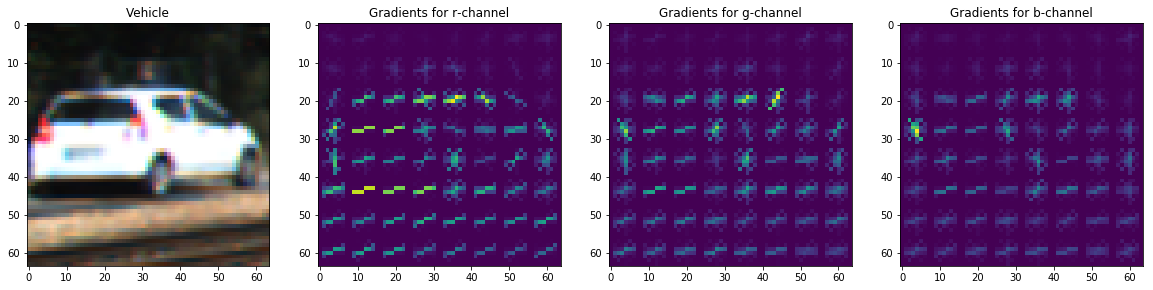

In [156]:
#Visalise the HOG plots for image
# Here it has taken 9 bins of direction orient(0-160)
#The number of cells per block are 2 and number of pixels per cell are 8
im1=vehicle_image[200]
im1=cv2.cvtColor(im1,cv2.COLOR_RGB2YUV)
r_channel=im1[:,:,0]
g_channel=im1[:,:,1]
b_channel=im1[:,:,2]
feature_0,hog_img_0=GetFeatureFromHog(r_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_1,hog_img_1=GetFeatureFromHog(g_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_2,hog_img_2=GetFeatureFromHog(b_channel,9,2,8,visualise=True,feature_vector_flag=True)
f,axes=plt.subplots(1,4,figsize=(20,10))
f.subplots_adjust(hspace=0.5)
axes[0].imshow(vehicle_image[200])
axes[0].set_title('Vehicle')
axes[1].imshow(hog_img_0)
axes[1].set_title('Gradients for r-channel')
axes[2].imshow(hog_img_1)
axes[2].set_title('Gradients for g-channel')
axes[3].imshow(hog_img_2)
axes[3].set_title('Gradients for b-channel')
# Now find the number of features can be extracted
print("Feature vector length is:", len(feature_0))
print("Number of features that can be extracted from an image",len(hog_img_1.ravel()))

* Now check non-vehicle HOG (Here we can see both YUV and RGB colorspace has same number of features)

/home/rabiranjan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Feature vector length is: 1764
Number of features that can be extracted from an RGB nonvehicle 4096
Feature vector length is: 1764
Number of features that can be extracted from an RGB nonvehicle 4096


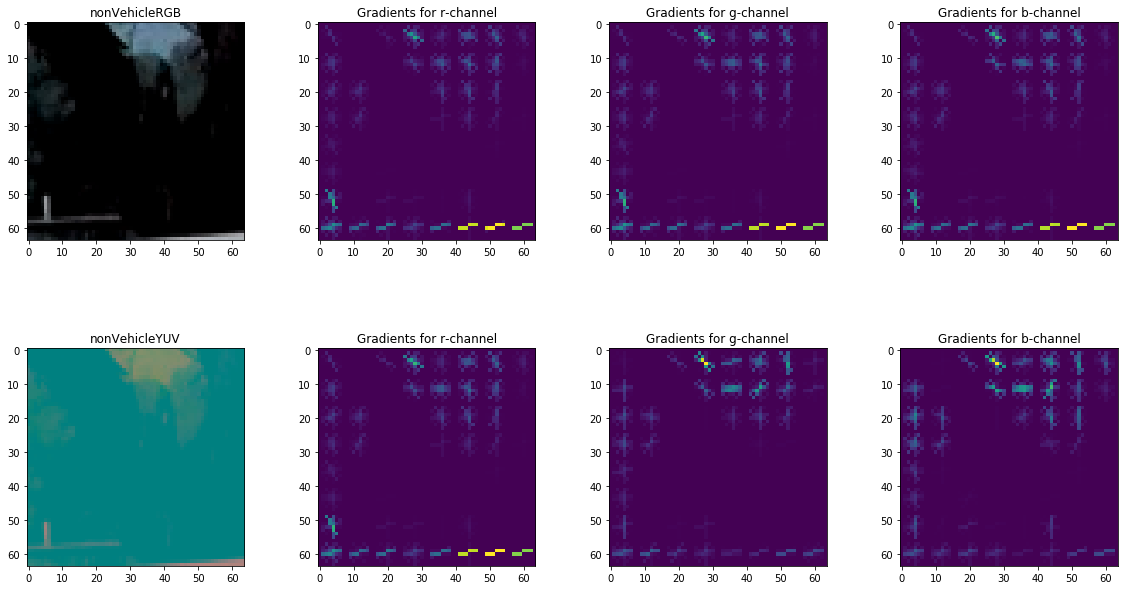

In [168]:
im2=nonvehicle_image[200]
im2=cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
im3=cv2.cvtColor(im2,cv2.COLOR_RGB2YUV)
r1_channel=im2[:,:,0]
g1_channel=im2[:,:,1]
b1_channel=im2[:,:,2]
feature_01,hog_img_01=GetFeatureFromHog(r1_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_11,hog_img_11=GetFeatureFromHog(g1_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_21,hog_img_21=GetFeatureFromHog(b1_channel,9,2,8,visualise=True,feature_vector_flag=True)
r2_channel=im3[:,:,0]
g2_channel=im3[:,:,1]
b2_channel=im3[:,:,2]
feature_02,hog_img_02=GetFeatureFromHog(r2_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_12,hog_img_12=GetFeatureFromHog(g2_channel,9,2,8,visualise=True,feature_vector_flag=True)
feature_22,hog_img_22=GetFeatureFromHog(b2_channel,9,2,8,visualise=True,feature_vector_flag=True)
f,axes=plt.subplots(2,4,figsize=(20,10))
f.subplots_adjust(hspace=0.5)
axes[0,0].imshow(im2)
axes[0,0].set_title('nonVehicleRGB')
axes[0,1].imshow(hog_img_01)
axes[0,1].set_title('Gradients for r-channel')
axes[0,2].imshow(hog_img_11)
axes[0,2].set_title('Gradients for g-channel')
axes[0,3].imshow(hog_img_21)
axes[0,3].set_title('Gradients for b-channel')
# Now find the number of features can be extracted
print("Feature vector length is:", len(feature_01))
print("Number of features that can be extracted from an RGB nonvehicle",len(hog_img_11.ravel()))
axes[1,0].imshow(im3)
axes[1,0].set_title('nonVehicleYUV')
axes[1,1].imshow(hog_img_02)
axes[1,1].set_title('Gradients for r-channel')
axes[1,2].imshow(hog_img_12)
axes[1,2].set_title('Gradients for g-channel')
axes[1,3].imshow(hog_img_22)
axes[1,3].set_title('Gradients for b-channel')
# Now find the number of features can be extracted
print("Feature vector length is:", len(feature_01))
print("Number of features that can be extracted from an RGB nonvehicle",len(hog_img_11.ravel()))

### Now its time to generate features data

In [178]:
#Now its time to extract the features from all the images and store into one list
def ExtractFeatures(images,orientation, cellsPerBlock,pixelsPerCell,convertColorspace=True):
    featureList=[]
    imageList=[]
# Here we don't require to append image list
# Convert colospace of image first from BGR to RGB and then YUV
    for image in images:
        image1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image2=cv2.cvtColor(image1,cv2.COLOR_BGR2YUV)
        local_features_1=GetFeatureFromHog(image2[:,:,0],orientation,cellsPerBlock,pixelsPerCell,False,True)
        local_features_2=GetFeatureFromHog(image2[:,:,1],orientation,cellsPerBlock,pixelsPerCell,False,True)
        local_features_3=GetFeatureFromHog(image2[:,:,2],orientation,cellsPerBlock,pixelsPerCell,False,True)
# Stack all the features verically
        x=np.hstack((local_features_1,local_features_2,local_features_3))
        featureList.append(x)
    return featureList

### Now its time to extract all the features from vehicle and nonvehicle images

In [211]:
%%time # print th wall time 

orientations=9
cellsPerBlock=2
pixelsPerCell=8
vehicleFeatures=ExtractFeatures(vehicle_image,orientations,cellsPerBlock,pixelsPerCell,True)
nonvehicleFeatures=ExtractFeatures(nonvehicle_image,orientations,cellsPerBlock,pixelsPerCell,True)

/home/rabiranjan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


* vstack (stack the array in sequence vertically(rowwise))
* hstack (stack the array in sequence horizontally(columnwise))
x=[[1 2]
 [3 4]]
y=[[4 5]
 [6 7]]
hstack[[1 2 4 5]
 [3 4 6 7]]
vstack[[1 2]
 [3 4]
 [4 5]
 [6 7]]

In [213]:
total_features=np.vstack([vehicleFeatures,nonvehicleFeatures])
print("Shape of the features list is",total_features.shape)
labelList=np.concatenate([np.ones(len(vehicleFeatures)),np.zeros(len(nonvehicleFeatures))])
print("Shape of the label list is",labelList.shape)

Shape of the features list is (17760, 5292)
Shape of the label list is (17760,)


### Data Preprocessing (Split training and testing data)

In [215]:
#train test split of data(take 20% of featureslist as test data)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(total_features,labelList,test_size=0.2,shuffle=True)

### Scale and normalize train and test data 
* StandardScaler(removes the mean and scaling to unit variance)
* RobustScaler(Removes the median and scales the data according to the quantile range)

In [216]:
# Use scaler(standard or RobustScaler) to standardize the feature values
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler=RobustScaler().fit(total_features)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model Training a classifier(Linear SVC)

In [217]:
%%time
# Train a linear SVM classifier
from sklearn.svm import LinearSVC
clf1=LinearSVC()
clf1.fit(X_train,Y_train)
print("Accuracy of SVC is",clf1.score(X_test,Y_test))

Accuracy of SVC is 0.9853603603603603
CPU times: user 5.48 s, sys: 286 ms, total: 5.77 s
Wall time: 6.66 s


In [235]:
# Check some samples
n_predict=10
print("Model Predicts:",clf1.predict(X_test[0:n_predict]))
print('Actual labels:',Y_test[0:n_predict])

Model Predicts: [0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
Actual labels: [0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]


### Now check with RandomForestClassifier 

In [240]:
# Include library for RandomForestClassifier and GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import time
print("Using Orientations=",orientations,"CellsPerBlock=",cellsPerBlock,'pixelsPerCell=',pixelsPerCell)
rf=RandomForestClassifier(n_estimators=50, min_samples_split=7, min_samples_leaf=1)
# Check the training time for RF
t=time.time()
rf.fit(X_train,Y_train)
t2=time.time()
print(round(t2-t),"seconds to train by RF")
print("Test Accuracy=",round(rf.score(X_test,Y_test),4))
# Check the prediction time
n_predict=20
t1=time.time()
print("Model Predict",rf.predict(X_test[0:n_predict]))
t2=time.time()
print("Actual Label",Y_test[0:n_predict])
print("The time required to predict output=",round(t2-t1,2),"in sec")

Using Orientations= 9 CellsPerBlock= 2 pixelsPerCell= 8
54 seconds to train by RF
Test Accuracy= 0.9797
Model Predict [0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
Actual Label [0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
The time required to predict output= 0.01 in sec


* Here it is showing Support Vector classifier is showing more accuracy than Random forest classifier  

### Sliding Window

* Sliding window approach which will scan the image frames from video whether any vehicle is there or not.
* Classifier will identify whether any potential car matches in the video frame so that we can run it against classifier

In [259]:
#Function to draw sliding window and boxes on an image

import matplotlib.image as mpimg
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    
    for bbox in bboxes:
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        color=(r, g, b)
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

### Using the classifier on test images

In [282]:
# function that returns the refined Windows
# From Refined Windows we mean that the windows where the classifier predicts the output to be a car

def DrawCars(image,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64))
            
            f1=ExtractFeatures([clippedImage], 9 , 2 , 8,converColorspace)
        
            predictedOutput=clf1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

In [283]:
# trying out SubSampling using HOG but not able to go through as feature size is not the same.

def DrawCarsOptimised(image, image1, image2,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        clippedImage1=image1[start[1]:end[1], start[0]:end[0]]
        clippedImage2=image2[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64)).ravel()
            clippedImage1=cv2.resize(clippedImage1, (64,64)).ravel()
            clippedImage2=cv2.resize(clippedImage2, (64,64)).ravel()
            
            #f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
            f1= np.hstack((clippedImage,clippedImage1,clippedImage2))
            f1=scaler.transform(f1.reshape(1,-1))   
            print(f1.shape)
            predictedOutput=clf1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

Total No of windows are  135


/home/rabiranjan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


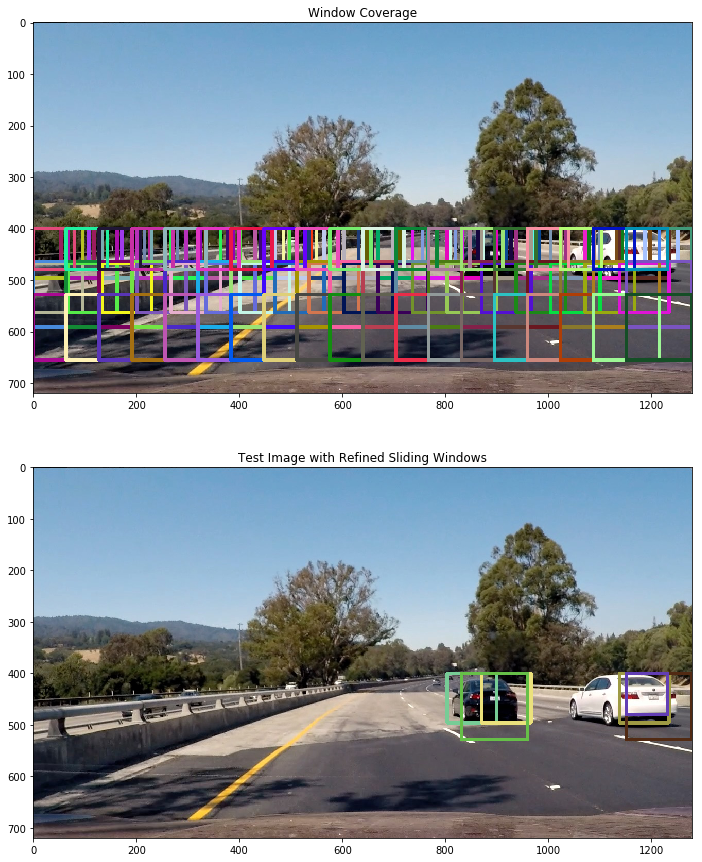

In [305]:
#testing our functions of slide_window and draw window. Defining here dummy windows
image = mpimg.imread('./Udacity-CarND-Vehicle-Detection-and-Tracking-master/test_images/test4.jpg')

windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,464], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows4 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,480], 
                    xy_window=(80,80), xy_overlap=(0.2, 0.2))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,612], 
                    xy_window=(96,96), xy_overlap=(0.3, 0.3))
windows3 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,660], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))
refinedWindows=DrawCars(image,windows, True)

f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)

### Apply Heatmap/coloplethmap

#### What is heatmap and why it is used?
* Heatmap is a visual display of data which can visually presented through coloscale at each pixel color information if som object is found
* Here the individual values contained in the matrix are represented as color
* It is really useful to display general view of numerical data 

In [309]:
# Heat map and threshold functions from Udacity's course
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        #Add +=1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1,y1),(x2,y2))
         heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap 
# applying a threshold value to the image to filter out low pixel cells

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap
# find pixels with each car number and draw the final bounding boxes

from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

 Number of Cars found -  2


Text(0.5,1,'Final Image after applying Heat Map')

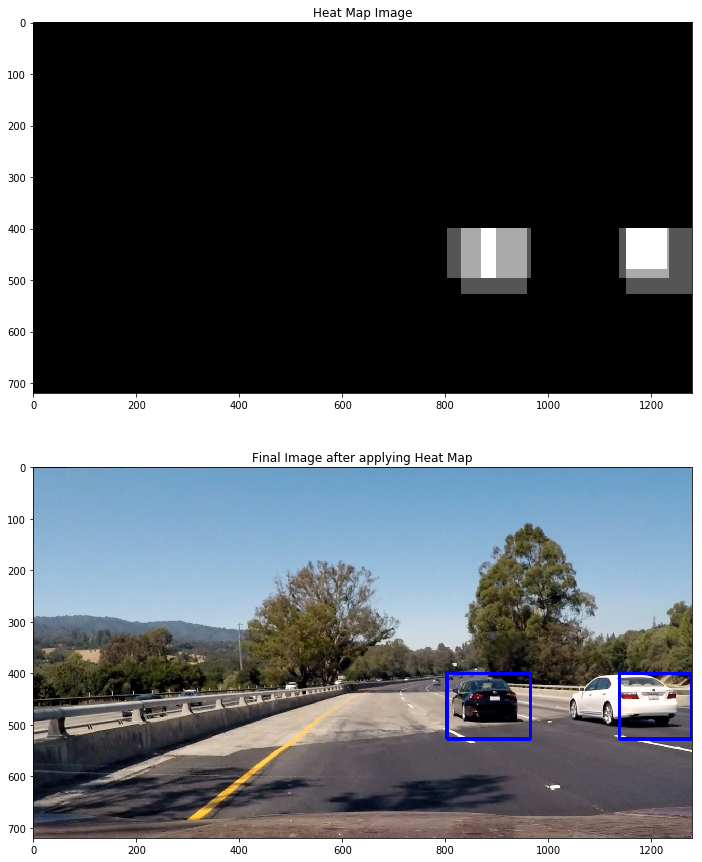

In [325]:
#testing our heat function

heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = add_heat(heat,refinedWindows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,0.5)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

heat_image=heatmap

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(" Number of Cars found - ",labels[1])
draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(heat_image,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image after applying Heat Map")

### Now test all the given test images

### Define Pipeline

In [340]:
# First defiene all the parameters for pipeline to run
orientation=9 # number of orientation (direction range) in HOG
cellsPerBlock=2 # Number of cells per block
pixelsPerCell=8 # Number of pixels per cell
xy_window=(64,64)# Window size
xy_overlap=(0.15,0.15)# Window overlap. (0.15 means 85% of the window is overlapped)
x_start_stop=[0,image.shape[1]] # X coordinates start from 0 to end of the image
y_start_stop=[400,660] # For scanning it is only require from to see only the road 
# Window 1- Size - 64x64 , Overlap-85%
windows_normal = slide_window(image, x_start_stop, [400,464], 
                    xy_window, xy_overlap)

# Window 2- Size - 80x80 , Overlap-80%
xy_window_1_25= (80,80)
xy_window_1_25_overlap=(0.2, 0.2)    
windows_1_25 = slide_window(image, x_start_stop, [400,480], 
                    xy_window_1_25, xy_window_1_25_overlap)

# Window 3- Size - 96x96 , Overlap-70%
xy_window_1_5= (96,96)
xy_window_1_5_overlap=(0.3, 0.3)    
windows_1_5 = slide_window(image, x_start_stop, [400,612], 
                    xy_window_1_5, xy_window_1_5_overlap)

# Window 4- Size - 128x128 , Overlap-50%
xy_window_twice_overlap=(0.5, 0.5)    
xy_window_twice = (128,128)
windows_twice = slide_window(image, x_start_stop, [400,660], 
                    xy_window_twice, xy_window_twice_overlap)

# Total Windows - 470
windows= windows_normal +  windows_1_5  + windows_twice +windows_1_25
print("No of Windows are ",len(windows))

No of Windows are  135


In [349]:
# Defining a pipeline for Video Frame Processing
# Note here the track of last 15 frames is kept

def Pipeline(image):
#     features,hog_image=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features1,hog_image1=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features2,hog_image2=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     refinedWindows=DrawCarsOptimised(hog_image,hog_image1,hog_image2,windows, True)
    
#     image=find_cars(image, 400, 528, 1,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 560, 1.25,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 588, 1.5,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 660, 2,  orientation, pixelsPerCell, cellsPerBlock)
    rand= random.randint(0,1)
    if(rand<0.4):
        refinedWindows=keepTrack.refinedWindows[:-1]
    else:
        refinedWindows=DrawCars(image,windows, True)
        if len(refinedWindows) > 0:
            keepTrack.AddWindows(refinedWindows)
    
    #refinedWindows=DrawCars(image,windows, True)
#     if len(refinedWindows) > 0:
#         keepTrack.AddWindows(refinedWindows)
            
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for refinedWindow in keepTrack.refinedWindows:
        heat = add_heat(heat, refinedWindow)
    
    
    
    heatmap = apply_threshold(heat, 25 + len(keepTrack.refinedWindows)//2)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img
# Defining a different pipeline to process the images as we do not want to keep track of previous frames here

def PipelineImage(image):

    refinedWindows=DrawCars(image,windows, True)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,refinedWindows)
   
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heat, 0.5)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img,heatmap

### Now its time to test the pipeline for test images


/home/rabiranjan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


CPU times: user 7.22 s, sys: 18.5 ms, total: 7.23 s
Wall time: 7.2 s


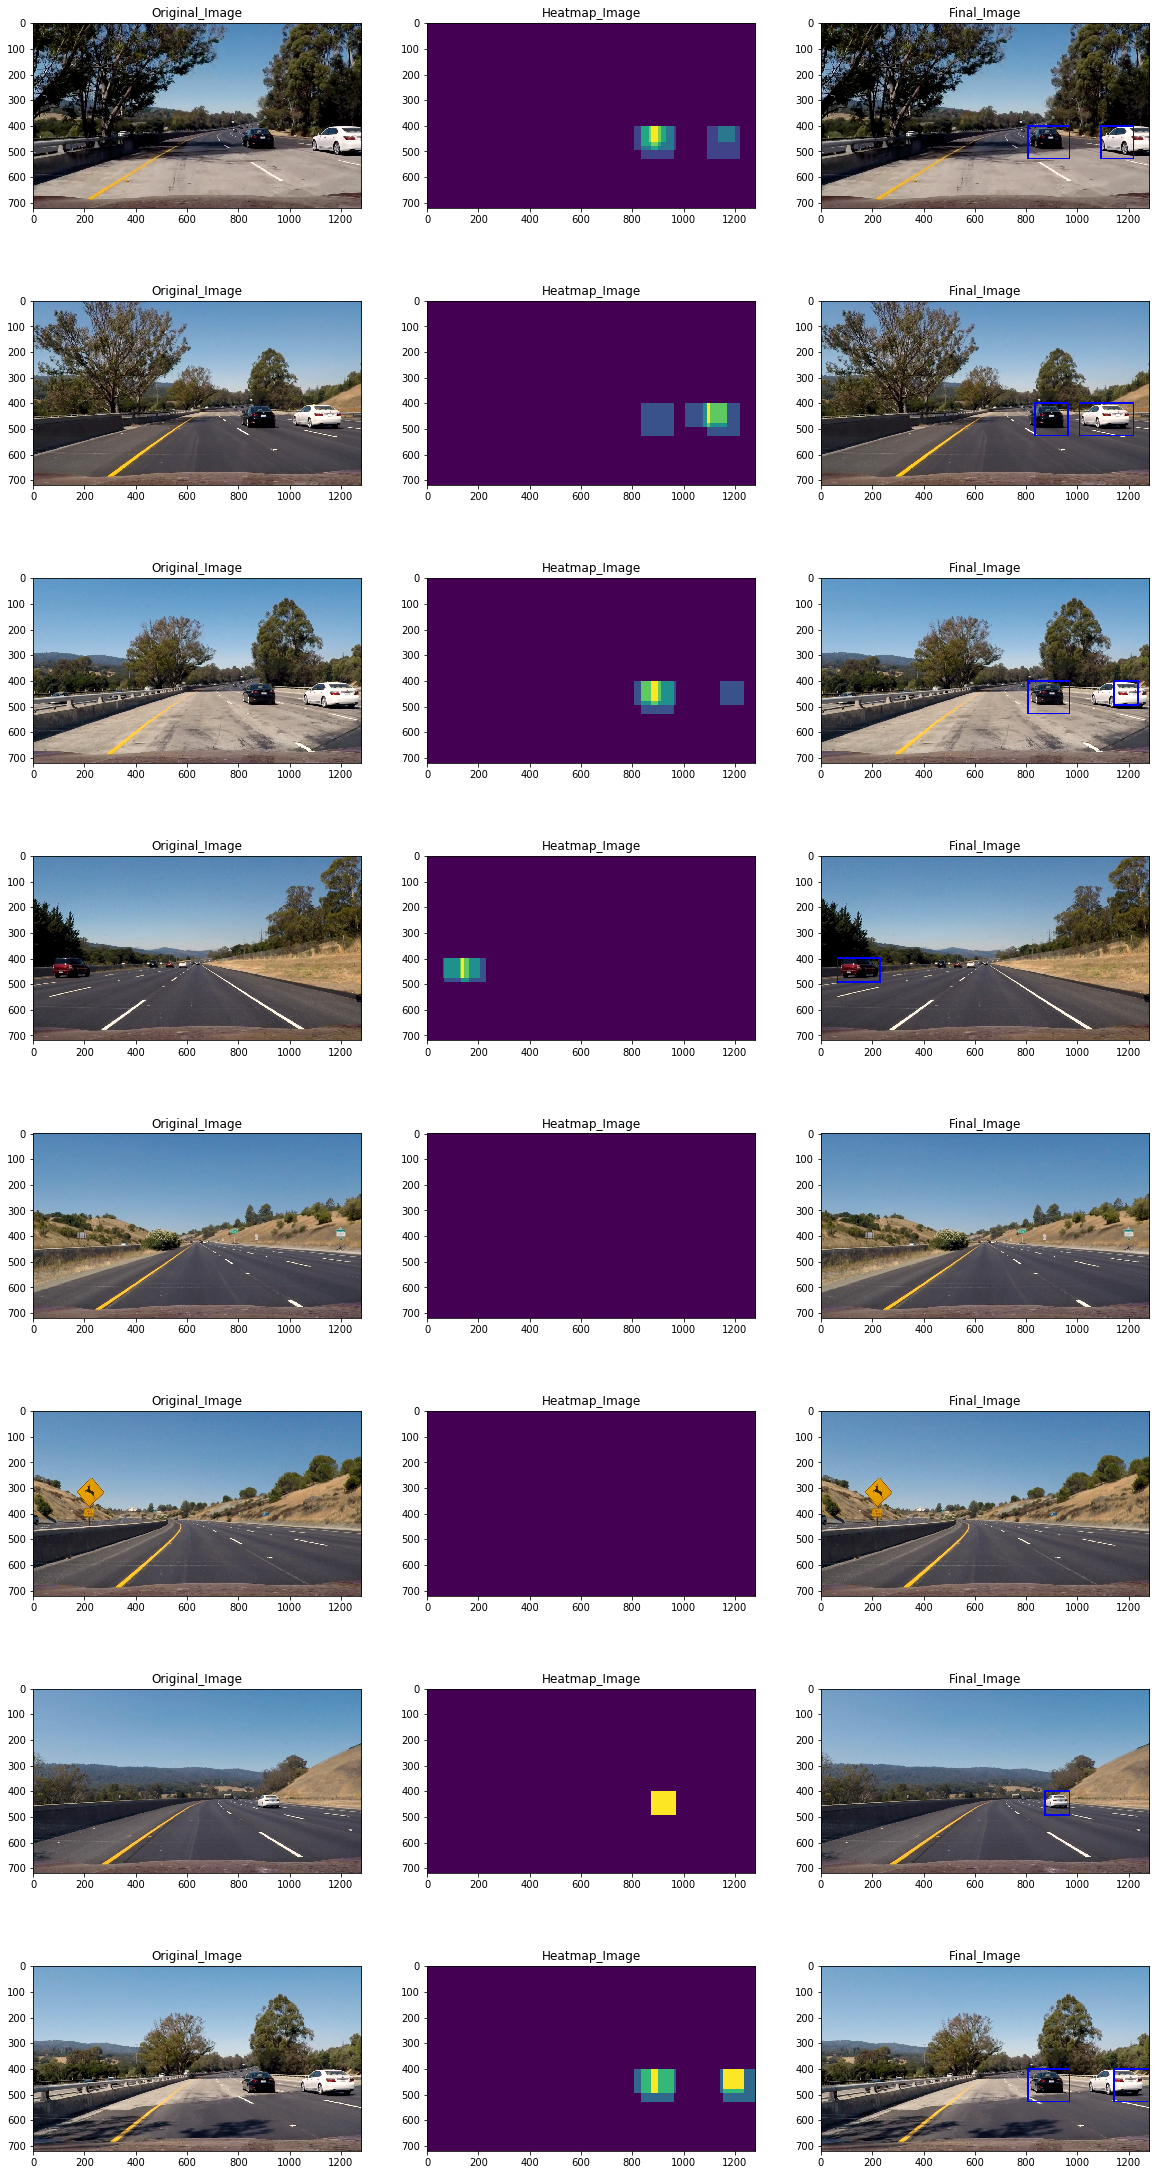

In [350]:
%%time
test_images=list(map(lambda img: cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB),
                     glob.glob('./Udacity-CarND-Vehicle-Detection-and-Tracking-master/test_images/*.jpg')))
f,axes=plt.subplots(8,3,figsize=(20,40))
for i,image in enumerate(test_images):
    finalPic,heatmap=PipelineImage(image)
    axes[i,0].imshow(image)
    axes[i,0].set_title("Original_Image")
    axes[i,1].imshow(heatmap)
    axes[i,1].set_title('Heatmap_Image')
    axes[i,2].imshow(finalPic)
    axes[i,2].set_title("Final_Image")